In [175]:
import re 
import pandas as pd
import nltk

In [176]:
# Read the content of the chat file
f = open("_chat.txt",'r', encoding ='utf-8')
data = f.read()

In [177]:
data

'[2023-10-19, 8:30:11 PM] NLP & Social Media - LAMBTON: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[2023-10-19, 8:30:11 PM] Auradee Castro: \u200eAuradee Castro created group “NLP & Social Media - LAMBTON”\n[2023-10-19, 8:30:11 PM] NLP & Social Media - LAMBTON: \u200eAuradee Castro added you\n[2023-10-19, 8:32:35 PM] Auradee Castro: Hello guys! 👋🏻🙂\n\u200e[2023-10-19, 8:38:10 PM] Roger Mais: \u200eGIF omitted\n[2023-10-19, 8:43:54 PM] Rochan: Hey everyone 😄\n[2023-10-19, 8:43:55 PM] Auradee Castro: Kindly research on different NLP projects and select your *top 2-3 topics*. We\'ll go over them tomorrow and make a final decision. Make sure that there is publicly available data of at least 100+ MB for the chosen topics. Thank you! 🙂\n[2023-10-19, 8:44:25 PM] Auradee Castro: hi rochan! this is my first time working with you hehe\n[2023-10-19, 8:44:45 PM] Rochan: Me too 😄\n[2023-10-19, 8:46:00 PM] Abhishek 

In [178]:
# Extract date, user, and message using regular expressions
pattern = r'\[(.*?)\] (.*?): (.*)'
matches = re.findall(pattern, data)

# Create a DataFrame
df = pd.DataFrame(matches, columns=['Date', 'User', 'Message'])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d, %I:%M:%S %p')

# Display the DataFrame
df

,Date,User,Message
0,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Messages and calls are end-to-end encrypted. ...
1,2023-10-19 20:30:11,Auradee Castro,‎Auradee Castro created group “NLP & Social Me...
2,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Auradee Castro added you
3,2023-10-19 20:32:35,Auradee Castro,Hello guys! 👋🏻🙂
4,2023-10-19 20:38:10,Roger Mais,‎GIF omitted
...,...,...,...
699,2023-11-17 11:34:11,~ Olivia,Which room again
700,2023-11-17 11:34:29,Abhishek Natani,Second floor where Tuesday class is scheduled
701,2023-11-17 11:37:55,~ Olivia,Thanks
702,2023-11-17 11:57:23,Roger Mais,202


In [179]:
# Additional Date column formatting
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y, %H:%M - ')
df.head()

,Date,User,Message
0,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Messages and calls are end-to-end encrypted. ...
1,2023-10-19 20:30:11,Auradee Castro,‎Auradee Castro created group “NLP & Social Me...
2,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Auradee Castro added you
3,2023-10-19 20:32:35,Auradee Castro,Hello guys! 👋🏻🙂
4,2023-10-19 20:38:10,Roger Mais,‎GIF omitted


In [180]:
# Extract additional time-related features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day'] = df['Date'].dt.day
df['minute'] = df['Date'].dt.minute
df['hour'] = df['Date'].dt.hour
df.head()

,Date,User,Message,year,month,day,minute,hour
0,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Messages and calls are end-to-end encrypted. ...,2023,October,19,30,20
1,2023-10-19 20:30:11,Auradee Castro,‎Auradee Castro created group “NLP & Social Me...,2023,October,19,30,20
2,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Auradee Castro added you,2023,October,19,30,20
3,2023-10-19 20:32:35,Auradee Castro,Hello guys! 👋🏻🙂,2023,October,19,32,20
4,2023-10-19 20:38:10,Roger Mais,‎GIF omitted,2023,October,19,38,20


In [181]:
# Count total number of messages
total_msgs = len(df['Message'])
print("Total messages:", total_msgs)

Total messages: 704


In [182]:
# Count total words
words = [word for message in df['Message'] for word in message.split()]
print("Total words:", len(words))

Total words: 6994


In [183]:
# Display distinct users
distinct_users = df['User'].unique()
print(distinct_users)

['NLP & Social Media - LAMBTON' 'Auradee Castro' 'Roger Mais' 'Rochan'
 'Abhishek Natani' 'Varun' '~\u202fBhumika' '~\u202fOlivia' 'Miraj']


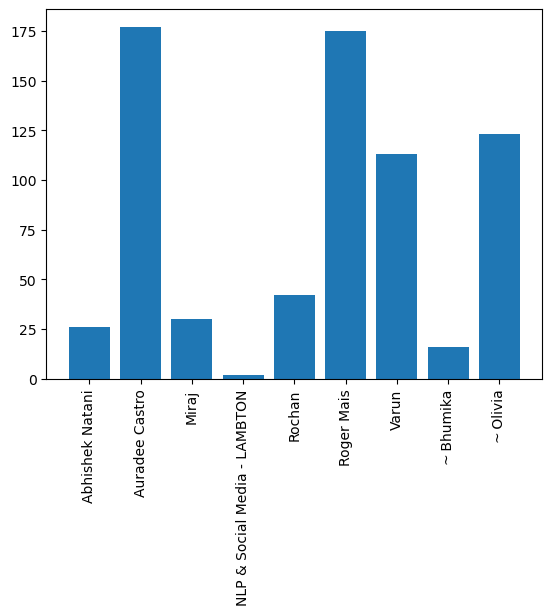

In [184]:
# Plot bar graph for message counts per user
message_counts = df.groupby('User')['Message'].count()
import matplotlib.pyplot as plt
name = message_counts.index
count = message_counts.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

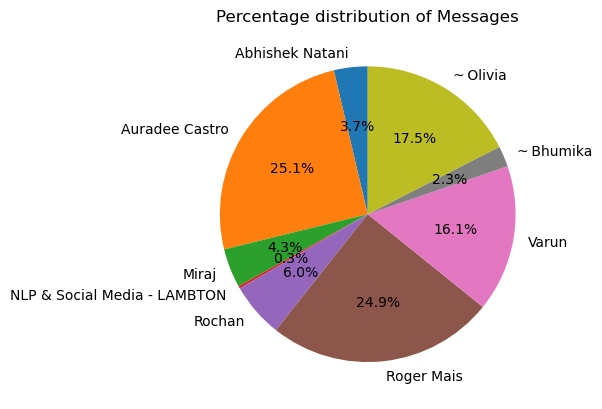

In [185]:
# Plot pie chart for percentage distribution of messages per user
msg_perc = round(message_counts / df.shape[0] * 100, 2)
name = msg_perc.index
perc = msg_perc.values
plt.pie(perc, labels=name, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Messages')
plt.show()

In [186]:
# Count total number of media messages
number_media_msgs = df[df['Message'].str.contains('omitted')].shape[0]
print("Total number of Media Messages:", number_media_msgs)

Total number of Media Messages: 63


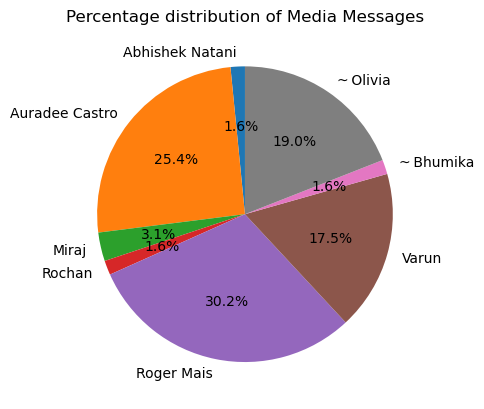

In [187]:
# Plot pie chart for percentage distribution of media messages per user
media_message_counts = df[df['Message'].str.contains('omitted')].groupby('User')['Message'].count()
msg_perc = round(media_message_counts / df.shape[0] * 100, 2)
name = msg_perc.index
perc = msg_perc.values
plt.pie(perc, labels=name, autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of Media Messages')
plt.show()

In [188]:
# Extract URLs from messages
from urlextract import URLExtract
extractor = URLExtract()
urls = [url for msg in df['Message'] for url in extractor.find_urls(msg)]
print("URLs shared in chat:\n")
for url in urls:
    print(url)
print("Count of URLs shared:", len(urls))

URLs shared in chat:

https://github.com/abccastro/NLP-Placeholder
https://github.com/abccastro/Movie-Sentiment-Analysis
https://github.com/abccastro/Movie-Sentiment-Analysis
README.md
https://www.kaggle.com/datasets/raynardj/imdb-vision-and-nlp?select=movies.csv
https://www.youtube.com/watch?v=iIGlAsN1nEs
https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/
https://github.com/users/abccastro/projects/1/views/1
https://towardsdatascience.com/sentiment-analysis-using-logistic-regression-and-naive-bayes-16b806eb4c4b?gi=42fd91672093
https://github.com/abccastro/Movie-Sentiment-Analysis/blob/dev/docs/Project%20Requirements.pdf
https://mylambton.sharepoint.com/:f:/r/sites/NLPandSocialMediaAnalytics/Shared%20Documents/General/Data%20Post%20Preprocessing?csf=1&web=1&e=ohPcGn,
Count of URLs shared: 11


In [189]:
# Remove stopwords from messages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def remove_stopwords(message):
    words = word_tokenize(message)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    return ' '.join(filtered_words)

df['Filtered_Message'] = df['Message'].apply(remove_stopwords)
df['Filtered_Message'] = df['Filtered_Message'].str.replace(r'\bomitted\b', '', regex=True)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,User,Message,year,month,day,minute,hour,Filtered_Message
0,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Messages and calls are end-to-end encrypted. ...,2023,October,19,30,20,calls encrypted one outside chat even WhatsApp...
1,2023-10-19 20:30:11,Auradee Castro,‎Auradee Castro created group “NLP & Social Me...,2023,October,19,30,20,Castro created group NLP Social Media LAMBTON
2,2023-10-19 20:30:11,NLP & Social Media - LAMBTON,‎Auradee Castro added you,2023,October,19,30,20,Castro added
3,2023-10-19 20:32:35,Auradee Castro,Hello guys! 👋🏻🙂,2023,October,19,32,20,Hello guys
4,2023-10-19 20:38:10,Roger Mais,‎GIF omitted,2023,October,19,38,20,


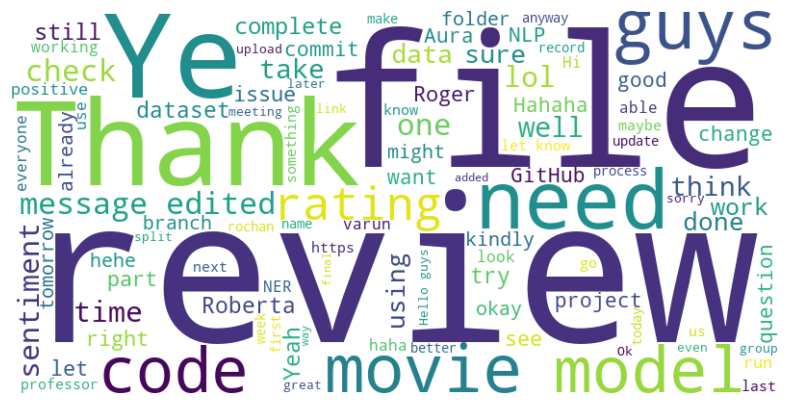

In [190]:
# Generate word cloud from filtered messages
from collections import Counter
from wordcloud import WordCloud

all_messages = ' '.join(df['Filtered_Message'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_messages)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
!pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/358.9 kB ? eta -:--:--
   ---- ----------------------------------- 41.0/358.9 kB 1.9 MB/s eta 0:00:01
   ------------------- -------------------- 174.1/358.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------- ----------- 256.0/358.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  358.4/358.9 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 358.9/358.9 kB 1.9 MB/s eta 0:00:00


In [192]:
import emoji
emojis = []
emoji_dict = emoji.get_emoji_unicode_dict(lang='en')
for message in df['Message']:
    emojis.extend([c for c in message if c in emoji_dict.values()])

In [193]:
print("Frequency of the emojis used in the whole chat")
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

Frequency of the emojis used in the whole chat


,0,1
0,😂,25
1,🙂,16
2,🤣,15
3,😅,12
4,😀,11
5,😊,8
6,😵,6
7,💫,6
8,👏,5
9,😬,3


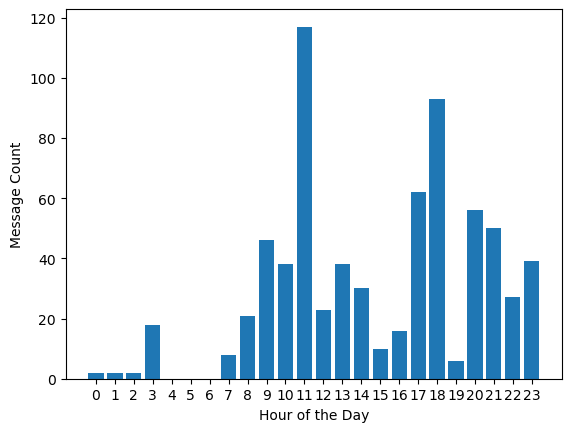

In [194]:
# Plot bar graph for message counts per hour of the day
df['hour_of_day'] = df['Date'].dt.hour
group_result = df.groupby('hour_of_day').size()  

hour = group_result.index
msg_in_hour = group_result.values
plt.bar(hour, msg_in_hour)
plt.xticks(range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Message Count')
plt.show()


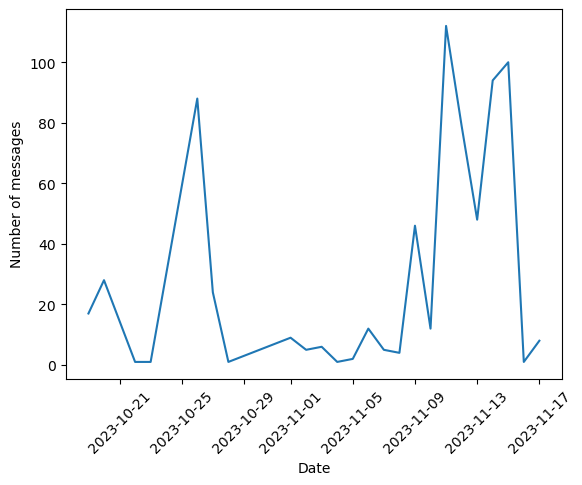

In [195]:
# Plot line graph for daily message timeline
df['Dates'] = df['Date'].dt.date
daily_timeline = df.groupby('Dates').count()['Message'].reset_index()
plt.plot(daily_timeline['Dates'], daily_timeline['Message'])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of messages")
plt.show()

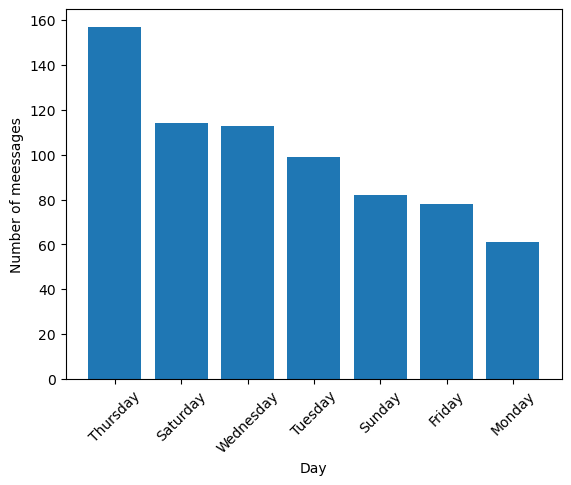

In [196]:
# Plot bar graph for message timeline for each day of the week
df['day_name'] =  df['Date'].dt.day_name()
day_msg = df['day_name'].value_counts()
plt.bar(day_msg.index,day_msg.values)
plt.xticks(rotation = 45)
plt.xlabel("Day")
plt.ylabel("Number of meessages")
plt.show()